In [227]:
import os
import pandas as pd
data_path = rf'C:\Users\{os.getlogin()}\PycharmProjects\NLP_project\data\abstract_2005_2020_gender_and_topic.csv'
documents_df = pd.read_csv(data_path, encoding='utf8')

In [140]:
documents_df.shape

(21784, 11)

In [49]:
from bertopic import BERTopic

In [136]:
loaded_model = BERTopic.load(rf"bertTopic_train(81876)_n_gram_1_1_min_topic_size_50_with_probs")

In [52]:
topics_to_words = loaded_model.get_topics()

In [56]:
(topics_to_words[0])

[('eye', 0.029835224631279213),
 ('visual', 0.018446292381377),
 ('retinal', 0.016868776725844477),
 ('macular', 0.016512792631981313),
 ('acuity', 0.01600103332118814),
 ('ranibizumab', 0.012391011628467539),
 ('corneal', 0.010633755851673622),
 ('glaucoma', 0.010284761257552946),
 ('iop', 0.010206322218341125),
 ('ocular', 0.010020834002187607)]

In [188]:
docs = documents_df.clean_title_and_abstract.to_list()
topics, probs = loaded_model.transform(docs)

Batches:   0%|          | 0/681 [00:00<?, ?it/s]

In [202]:
import numpy as np

In [220]:
probs

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.77357440e-04, 1.09090787e-03, 9.96423662e-04, ...,
        9.82805070e-04, 2.55125450e-03, 1.02191886e-03],
       [2.35305158e-04, 5.10131109e-04, 2.93485199e-04, ...,
        4.36185374e-04, 3.86868067e-04, 4.38642682e-04],
       ...,
       [8.34211688e-04, 2.56834609e-03, 1.22896723e-03, ...,
        1.41206377e-03, 1.02565687e-03, 1.87399337e-03],
       [2.56638844e-12, 2.71134283e-03, 3.47501465e-12, ...,
        2.59675731e-10, 9.57965270e-12, 2.52828413e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [208]:
probs2 = probs.copy()

In [212]:
main_topic=[np.argmax(item) for item in probs2]
main_topic

[194,
 11,
 263,
 196,
 196,
 23,
 97,
 36,
 119,
 76,
 167,
 9,
 24,
 255,
 23,
 35,
 38,
 37,
 30,
 50,
 107,
 68,
 37,
 130,
 122,
 221,
 119,
 195,
 154,
 42,
 71,
 154,
 6,
 240,
 193,
 76,
 76,
 63,
 70,
 30,
 48,
 6,
 222,
 31,
 25,
 65,
 42,
 67,
 177,
 6,
 0,
 23,
 159,
 49,
 146,
 17,
 195,
 105,
 76,
 49,
 207,
 21,
 56,
 42,
 154,
 139,
 37,
 152,
 49,
 98,
 21,
 97,
 0,
 168,
 131,
 50,
 36,
 33,
 31,
 49,
 139,
 122,
 42,
 177,
 245,
 0,
 59,
 50,
 67,
 39,
 21,
 177,
 146,
 4,
 53,
 9,
 109,
 150,
 195,
 3,
 76,
 30,
 187,
 26,
 25,
 184,
 140,
 24,
 97,
 116,
 36,
 36,
 267,
 125,
 9,
 37,
 125,
 35,
 50,
 21,
 107,
 49,
 63,
 3,
 159,
 140,
 154,
 48,
 9,
 150,
 262,
 21,
 35,
 126,
 163,
 149,
 232,
 13,
 36,
 260,
 25,
 10,
 250,
 40,
 43,
 42,
 54,
 30,
 7,
 132,
 56,
 240,
 105,
 0,
 26,
 42,
 207,
 17,
 141,
 23,
 9,
 125,
 9,
 35,
 24,
 24,
 9,
 20,
 25,
 37,
 6,
 0,
 98,
 42,
 34,
 207,
 97,
 9,
 22,
 10,
 71,
 0,
 103,
 48,
 48,
 124,
 68,
 26,
 109,
 208,
 7,


In [222]:
# col_topics = pd.Series(topics)
# col_probs = pd.Series(probs)
result_series = []
for prob in probs:
    result_series.append(str(prob.tolist()))
print(result_series)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [228]:
col_probs = pd.Series(result_series)

In [213]:
documents_df['major_topic'] = main_topic

In [229]:
# documents_df['topic']=col_topics
documents_df['probs']=col_probs

In [230]:
documents_df.to_csv(rf'C:\Users\{os.getlogin()}\PycharmProjects\NLP_project\data\abstract_2005_2020_gender_and_topic.csv',
                      index=False)

In [122]:
topics_gender = documents_df[['topic','female_rate']]

In [123]:
topics_gender.female_rate.max()

1.0

In [150]:
df1 = documents_df.groupby('topic')['female_rate'].apply(list).reset_index(name='female_rate')

In [151]:
df1

,topic,female_rate
0,-1,"[0.4432989690721649, 0.0352112676056338, 1.0, ..."
1,0,"[0.4309290953545232, 0.5411392405063291, 0.465..."
2,1,"[0.5789473684210527, 0.8611111111111112, 0.280..."
3,2,"[0.6512448132780083, 0.6498002663115846, 0.0, ..."
4,3,"[0.7113924050632912, 1.0, 0.75, 0.711462450592..."
...,...,...
269,268,"[0.5, 0.5, 0.5, 0.4166666666666667, 0.41666666..."
270,269,"[0.4285714285714285, 0.458966565349544, 0.4589..."
271,270,"[0.672316384180791, 0.6287425149700598, 0.6287..."
272,271,"[0.4469696969696969, 0.4512195121951219, 0.559..."


In [135]:
df1.iloc[99]["female_rate"]

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [97]:
info_df = loaded_model.get_topic_info()
info_df

,Topic,Count,Name
0,-1,24535,-1_and_the_with_for
1,0,1544,0_eye_visual_retinal_macular
2,1,1033,1_antibiotic_infection_pneumonia_aureus
3,2,947,2_pain_analgesia_block_postoperative
4,3,901,3_statin_ldlc_cholesterol_atorvastatin
...,...,...,...
281,280,51,280_catheter_cannulation_venous_vein
282,281,51,281_amyloidosis_transthyretin_tafamidis_amyloid
283,282,51,282_als_amyotrophic_lateral_sclerosis
284,283,50,283_dapagliflozin_empagliflozin_cardiovascular...


In [219]:
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import numpy as np

In [133]:
# pdf = PdfPages("output1.pdf")
with PdfPages('topic_female_rate_hists.pdf') as pdf:
    for index, row in df1.iterrows():
        fig = sns.histplot(data=row, x="female_rate" , kde=True).set_title(f'Topic {info_df.iloc[row["topic"]+1]["Name"]}\n{len(row["female_rate"])} docs')
        fig = fig.get_figure()
        mean = np.nanmean(np.array(row.female_rate))
        plt.axvline(x=mean, linewidth=3, color='b', label="mean", alpha=0.5)
        pdf.savefig(fig)
        plt.clf()

<Figure size 432x288 with 0 Axes>

In [7]:
topics_gender.to_csv(rf'C:\Users\{os.getlogin()}\PycharmProjects\NLP_project\data\gender_and_topic.csv',
                      index=False)

AttributeError: 'DataFrameGroupBy' object has no attribute 'to_csv'

In [86]:
info_df = loaded_model.get_topic_info()

In [88]:
df1['Topic_Name'] = info_df['Name']
df1

,topic,list,Topic_Name
0,-1,"[0.4426229508196721, 0.4432989690721649, 0.035...",-1_and_the_with_for
1,0,"[0.4309290953545232, 0.5411392405063291, 0.465...",0_eye_visual_retinal_macular
2,1,"[0.4251207729468599, 0.2971428571428571, 0.919...",1_antibiotic_infection_pneumonia_aureus
3,2,"[0.8633333333333333, 1.0, 0.6973684210526315, ...",2_pain_analgesia_block_postoperative
4,3,"[1.0, 1.0, 0.3720930232558139, 0.4983606557377...",3_statin_ldlc_cholesterol_atorvastatin
...,...,...,...
280,280,"[0.2607449856733524, 0.216, 0.3772727272727272...",279_antidepressant_gene_genetic_polymorphism
281,281,"[0.5529411764705883, 0.3809523809523809, 0.330...",280_catheter_cannulation_venous_vein
282,282,"[0.4583333333333333, 0.3957115009746588, 0.47,...",281_amyloidosis_transthyretin_tafamidis_amyloid
283,283,"[0.2854700854700854, 0.2854700854700854, 0.318...",282_als_amyotrophic_lateral_sclerosis


Text(0.5, 1.0, 'Topic 0\n 468 docs')

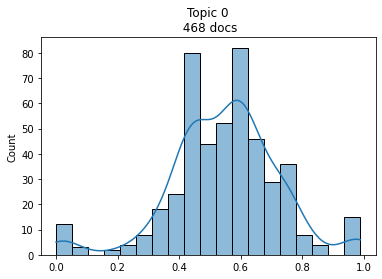

In [70]:
fig2 = sns.histplot(df1.iloc[1]['list'], kde=True).set_title(f'Topic 0\n {len(df1.iloc[1]["list"])} docs')
fig2

In [7]:
documents_df = documents_df[~documents_df['female'].isnull()]
documents_df = documents_df[~documents_df['male'].isnull()]
documents_df['female_rate'] = documents_df['female'] / (documents_df['female']+documents_df['male'])
documents_df.to_csv(rf'C:\Users\{os.getlogin()}\PycharmProjects\NLP_project\Data\abstract_2005_2020_gender.csv',index=False)